# Анализ комментариев в социальных сетях

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

В представленной задаче необходимо по тексту комментария степень его токсичности. Это задача классификации на $K$ классов, которые могут пересекаться $Y\in\{0,1\}^K$, возможные классы:
- toxic;
- severe_toxic;
- obscene;
- threat;
- insult;
- identity_hate.

Загрузим имеющиеся данные.

In [2]:
data = pd.read_csv('data/toxic_comment.csv', index_col=0)

In [4]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.loc['0001b41b1c6bb37e', 'comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

Проведем предварительный анализ. Для этого посмотрим на распределение классов.

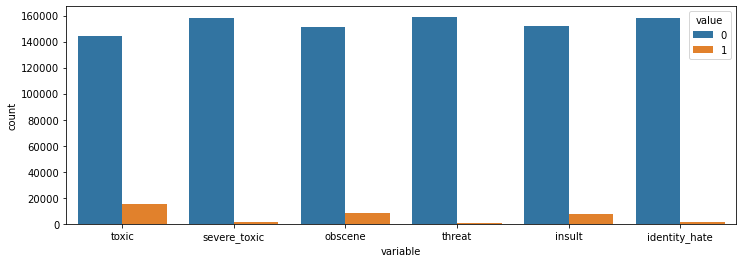

In [6]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(data.drop('comment_text', axis=1)))
plt.show()

Как видно из данного графика, классы несбалансированы. Это необходимо учитывать при оценке качества модели. Предварительно разобьем выборку на обучение и контроль:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], 
                                                    data.drop('comment_text', axis=1), 
                                                    test_size=0.33,
                                                    random_state=42)

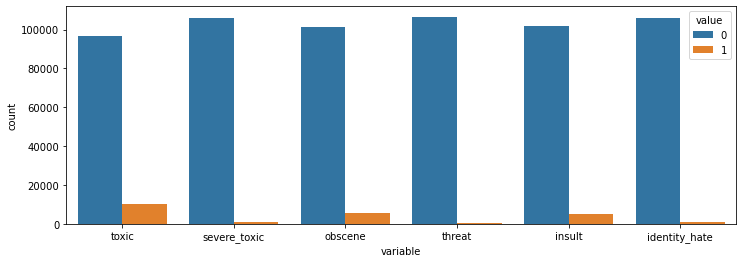

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(y_train))
plt.show()

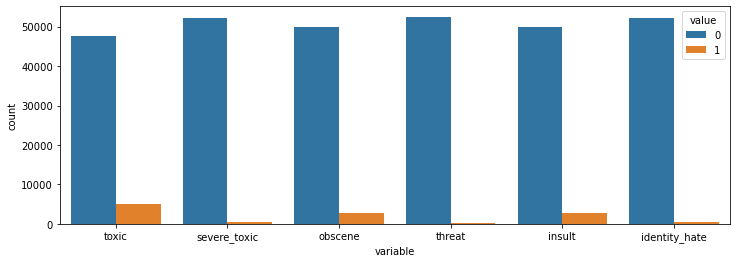

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(y_test))
plt.show()

## 1. Преобразование текстовых данных

Для преобразования текстов комментариев в числовые векторы воспользуемся методами `CountVectorizer` и `TfIdfVectorizer` из пакета `sklearn`.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Чтобы составить корпус слов и посчитать число вхождений каждого слова в комментарии, необходимо последовательно применить функции `fit` и `transform` в `CountVectorizer`, или же сразу `fit_transform`. Начнем с `CountVectorizer`.

In [12]:
count_vec = CountVectorizer()

In [13]:
comments_vec_train = count_vec.fit_transform(X_train)

In [14]:
comments_vec_train

<106912x149271 sparse matrix of type '<class 'numpy.int64'>'
	with 4656441 stored elements in Compressed Sparse Row format>

Таким образом `CountVectorizer` запоминает все слова, которые встречались в комментариях из `X_train`. Всего в корпусе оказалось 149271 слов. Теперь необходимо посчитать количество вхождений каждого из слов корпуса для тестового набора:

In [15]:
comments_vec_test = count_vec.transform(X_test)

## 2. Построение модели логистической регрессии

Решение задачи классификации на пересекающихся $K$ классов может быть сведено к решению $K$ задач бинарной классификации. В задачах с большим количеством признаков хорошие результаты показывают линейные модели.

<div class="alert alert-info">

<h3> Задание 1.</h3>
<p></p>

 <ol>
  <li>Решить поставленную задачу с помощью модели логистической регрессии. Для этого необходимо обучить 6 моделей на полученных векторах текстов comments_vec_train и каждом из столбцов y_train.</li>
 <p></p>

      
  <li>Для тестового набора данных comments_vec_test предсказать, принадлежит ли комментарий к каждому из 6 классов с помощью метода predict.</li>
<p></p>
  

 </ol> 
</div>

In [16]:
from sklearn.linear_model import LogisticRegression

for i in range(0,6):
    y = y_train.iloc[:,i:i+1].values.ravel()
    lg = LogisticRegression()
    exec(f"leg{i+1} = {lg}.fit(comments_vec_train, y)")
    exec(f"predict{i+1} = leg{i+1}.predict(comments_vec_test)")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [17]:
y_pred = np.array([predict1,predict2,predict3,predict4,predict5,predict6])

## 3. Оценка качества модели

Для оценки качества каждой из моделей воспользуемся F-мерой. Оценка качества по всем 6 классам будет проводиться по следующей формуле:
$$F1=\frac{1}{6}\sum_{i=1}^6f1_i$$

<div class="alert alert-info">

<h3> Задание 2.</h3>
<p></p>

 <ol>
  <li>Оценить качество полученной модели по всем 6 классам.</li>
 <p></p>

      
  <li>Провести преобразование текста с помощью метода Tf-Idf и построить модель логистической регрессии аналогично заданию 1. Какого качества удалось достичь?</li>
<p></p>
  

 </ol> 
</div>

In [18]:
from sklearn.metrics import f1_score

In [19]:
fscores = np.array([f1_score(y_pred[i] ,y_test.iloc[:,i].values) for i in range (0,6)])
f1 = np.mean(fscores)
f1

0.4907276682024065

In [20]:
tfdf_vec = TfidfVectorizer()
comments_vec_train_tfdf = tfdf_vec.fit_transform(X_train)
comments_vec_test_tfdf = tfdf_vec.transform(X_test)

In [21]:
comments_vec_train_tfdf.shape

(106912, 149271)

In [22]:
comments_vec_test_tfdf.shape

(52659, 149271)

In [ ]:
for i in range(0,6):
    y = y_train.iloc[:,i:i+1].values.ravel()
    lg_tfdf = LogisticRegression()
    exec(f"leg_tfdf{i+1} = {lg_tfdf}.fit(comments_vec_train_tfdf, y)")
    exec(f"predict_tfdf{i+1} = leg_tfdf{i+1}.predict(comments_vec_test_tfdf)")

In [ ]:
y_pred_tfdf = np.array([predict_tfdf1,predict_tfdf2,predict_tfdf3,predict_tfdf4,predict_tfdf5,predict_tfdf6])

In [ ]:
fscores_tfdf = np.array([f1_score(y_pred_tfdf[i], y_test.iloc[:,i].values) for i in range (0,6)])
f1_tfdf = np.mean(fscores_tfdf)
f1_tfdf

#### Некоторые параметры TfidfVectorizer: 
#### input : string {‘filename’, ‘file’, ‘content’}
#### lowercase : boolean, default True
#### preprocessor : callable or None (default)
#### tokenizer : callable or None (default)
#### stop_words : string {‘english’}, list, or None (default)'
#### ngram_range : tuple (min_n, max_n)
#### max_df : float in range [0.0, 1.0] or int, default=1.0
#### min_df : float in range [0.0, 1.0] or int, default=1
#### max_features : int or None, default=None

In [59]:
data = pd.read_csv('data/toxic_comment.csv', index_col=0)

In [60]:
def text_prepare(text):
    """
        text: a string
        
        return: modified string
    """
    # Перевести символы в нижний регистр
    text = text.lower() #your code
    
    # Заменить символы пунктуации на пробелы
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    
    # Удалить "плохие" символы
    text = re.sub('[^A-Za-z0-9 ]', '', text)
    
    # Удалить стопслова.
    stopWords = set(stopwords.words('english'))
    for stopWord in stopWords:
        text = re.sub(r'\b{}\b'.format(stopWord), '', text)
    return text

In [70]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
len(stopWords)

from tqdm import tqdm_notebook
from copy import deepcopy
new_test = deepcopy(data['comment_text'].values)
for i in tqdm_notebook(range(data['comment_text'].values.shape[0])):
    if i % 1000 ==0:
        print(i)
    new_test[i] = text_prepare(data['comment_text'].values[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-70-cc0b052134bd>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(data['comment_text'].values.shape[0])):


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
data['comment_test'] = new_test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data['comment_test'], 
                                                    data.iloc[:,1:7], 
                                                    test_size=0.33,
                                                    random_state=42)

In [64]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

class CW_TFiDF:
    
    def __init__(self, X_train, y_train, X_test, y_test, method):
#         dict_methods = {'TFiDF': TfidfVectorizer(),
#                         'CV': CountVectorizer()}
#         self.method = dict_methods[method]
        self.method = method
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred = None
        pass
    
    def preprocess(self):
        vec = self.method
        vec_train = vec.fit_transform(self.X_train)
        vec_test = vec.transform(self.X_test)
        return vec_train, vec_test
        
    @ignore_warnings(category=ConvergenceWarning)    
    def fitted(self):
        vec_train, vec_test = self.preprocess()
        a = []
        for i in range(0,6):
            y = self.y_train.iloc[:,i:i+1].values.ravel()
            lg = LogisticRegression(random_state = 42)
            lg.fit(vec_train, y)
            a.append(lg.predict(vec_test))
        return np.array(a)
    def f1score(self):
        y_pred = self.fitted()
        f1scores = np.array([f1_score(y_pred[i], y_test.iloc[:,i].values) for i in range (0,6)])
        f1 = np.mean(f1scores)
        return f1

In [83]:
c = CW_TFiDF(X_train, y_train, X_test, y_test, method = CountVectorizer(tokenizer=nltk.word_tokenize))

In [84]:
c.f1score()

0.47666011844363326

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], 
                                                    data.iloc[:,1:7], 
                                                    test_size=0.33,
                                                    random_state=42)
c = CW_TFiDF(X_train, y_train, X_test, y_test, method = CountVectorizer())
c.f1score()

0.4907276682024065

In [100]:
c = CW_TFiDF(X_train, y_train, X_test, y_test, method =  TfidfVectorizer())
c.f1score()

0.4814196898099811

## 4. Соревнование

Если посмотреть на полученный корпус слов, можно заметить большое количество мусорных слов. 
<a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html>CountVectorizer</a> и
<a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html>TfIdfVectorizer</a> имеют множество параметров, которые позволяют регулировать разбиения текстов на отдельные слова, в т.ч. с помощью регулярных выражений.

In [ ]:
print(count_vec.get_feature_names()[:100])

<div class="alert alert-info">

<h3> Задание 3.</h3>
<p></p>

 <ol>
  Меняя параметры CountVectorizer и TfIdfVectorizer, добиться наилучшего качества предсказаний на тестовой выборке.
<p></p>
  

 </ol> 
</div>

In [ ]:
data = pd.read_csv('data/toxic_comment.csv', index_col=0)

In [ ]:
def text_prepare(text):
    """
        text: a string
        
        return: modified string
    """
    # Перевести символы в нижний регистр
    text = text.lower() #your code
    
    # Заменить символы пунктуации на пробелы
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    
    # Удалить "плохие" символы
    text = re.sub('[^A-Za-z0-9 ]', '', text)
    
    # Удалить стопслова.
    stopWords = set(stopwords.words('english'))
    for stopWord in stopWords:
        text = re.sub(r'\b{}\b'.format(stopWord), '', text)
    return text

In [ ]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
len(stopWords)

from tqdm import tqdm_notebook
from copy import deepcopy
new_test = deepcopy(data['comment_text'].values)
for i in tqdm_notebook(range(data['comment_text'].values.shape[0])):
    if i % 1000 ==0:
        print(i)
    new_test[i] = text_prepare(data['comment_text'].values[i])

In [ ]:
data['comment_test'] = new_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['comment_test'], 
                                                    data.iloc[:,1:7], 
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
c = CW_TFiDF(X_train, y_train, X_test, y_test, method = CountVectorizer(tokenizer=nltk.word_tokenize))
c.f1score()